Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
discentes_df = pd.read_csv('discentes.csv')
docentes_df = pd.read_csv('docentes.csv')
producao_df = pd.read_csv('producao.csv')
trabalhos_df = pd.read_csv('trabalhos.csv')

qualis_df = pd.read_excel('Qualis CC 2013-2016.xlsx')

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

In [3]:
docentes_df.head()

,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


In [4]:
docentes_df.categoria.value_counts()

PERMANENTE     431
COLABORADOR     56
Name: categoria, dtype: int64

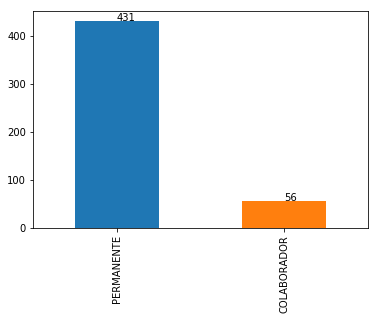

In [5]:
plot = docentes_df.categoria.value_counts().plot(kind='bar')

for idx, value in enumerate(list(docentes_df.categoria.value_counts())): 
    plot.annotate(value,(idx, value), xytext=(0, 0), textcoords='offset points')


## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

In [6]:
discentes_df.head()

,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
2,"FUENTES, A. D. (Principal)",INFORMÁTICA,15/04/2016,Não,948329,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAIN DOMINGUEZ FUENTES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
3,"GUEDES, A. L. V. (Principal) GUEDES, ALAN LIVI...",INFORMÁTICA,12/03/2013,Não,565354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAN LIVIO VASCONCELOS GUEDES,SIMONE DINIZ JUNQUEIRA BARBOSA,"[{'nome': 'SIMONE DINIZ JUNQUEIRA BARBOSA', 'c...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
4,"MENES, A. M. (Principal)",INFORMÁTICA,01/08/2014,Não,784513,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEJANDRO MUSTELIER MENES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO


In [7]:
discentes_df.nivel.unique()

array(['Mestrado', 'Doutorado', 'Graduação'], dtype=object)

In [8]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "programa"]]
discentes_pos_df.nivel.value_counts()

Mestrado     1820
Doutorado    1666
Name: nivel, dtype: int64

In [9]:
discentes_pos_df.programa.unique()

array(['INFORMÁTICA(31005012004P9)',
       'CIÊNCIA DA COMPUTAÇÃO(42005019016P8)',
       'COMPUTAÇÃO(31003010046P4)',
       'CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)',
       'CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)',
       'COMPUTAÇÃO(42001013004P4)', 'INFORMÁTICA(31001017110P8)',
       'CIÊNCIA DA COMPUTAÇÃO(33003017005P8)',
       'CIÊNCIA DA COMPUTAÇÃO(33002010176P0)',
       'CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)'],
      dtype=object)

### Mestrado

In [10]:
discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].programa.value_counts()

CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               337
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               270
COMPUTAÇÃO(42001013004P4)                                           194
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                183
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    173
COMPUTAÇÃO(31003010046P4)                                           168
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                137
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                133
INFORMÁTICA(31005012004P9)                                          115
INFORMÁTICA(31001017110P8)                                          110
Name: programa, dtype: int64

### Doutorado

In [11]:
discentes_pos_df[discentes_pos_df.nivel=='Doutorado'].programa.value_counts()

CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               379
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    319
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               193
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                169
COMPUTAÇÃO(42001013004P4)                                           125
COMPUTAÇÃO(31003010046P4)                                           114
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                111
INFORMÁTICA(31005012004P9)                                          102
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 91
INFORMÁTICA(31001017110P8)                                           63
Name: programa, dtype: int64

### Plot

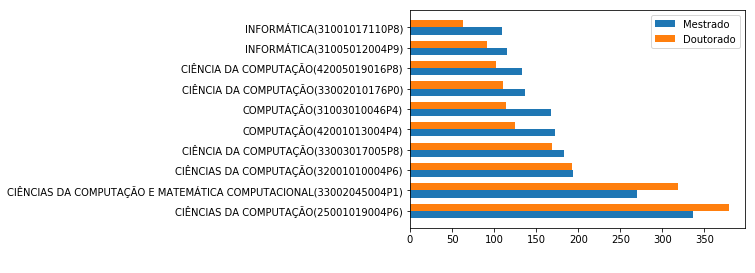

In [12]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_pos_df.programa.value_counts().keys()))

plt1 = ax.barh(ind-width/2, discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].programa.value_counts(), width)

for i in ind: 
    ax.annotate(value,(i, discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].programa.value_counts()[i]), 
                xytext=(0, 0), textcoords='offset points')


plt2 = ax.barh(ind+width/2, 
              discentes_pos_df[discentes_pos_df.nivel=='Doutorado'].programa.value_counts(), width)

ax.set_yticks(ind)
ax.set_yticklabels(discentes_pos_df.programa.value_counts().keys())

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

plt.show()

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?


In [13]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]

In [14]:
alunos = set(discentes_pos_df.discente_id)
professores = set(docentes_df[docentes_df.categoria=='PERMANENTE'].prof_id)

print('Total de {} alunos'.format(len(alunos)))
print('Total de {} professores do qudro permanente'.format(len(professores)))
print('Taxa de alunos de Mestrado/Doutorado por professor do quadro permanente {}'.format(len(alunos)/len(professores)))

Total de 3436 alunos
Total de 431 professores do qudro permanente
Taxa de alunos de Mestrado/Doutorado por professor do quadro permanente 7.972157772621809


In [15]:
docentes_df.head()

,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

In [16]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "programa","orientador"]]

docentes_pos_df = docentes_df[["nome"]]

docentes_alunos_df = pd.merge( docentes_pos_df , discentes_pos_df , left_on='nome' , right_on='orientador' )
docentes_alunos_df = docentes_alunos_df[["nome", "nivel","programa"]]
docentes_alunos_df.head()

,nome,nivel,programa
0,ALBERTO BARBOSA RAPOSO,Mestrado,INFORMÁTICA(31005012004P9)
1,ALBERTO BARBOSA RAPOSO,Doutorado,INFORMÁTICA(31005012004P9)
2,ALBERTO BARBOSA RAPOSO,Mestrado,INFORMÁTICA(31005012004P9)
3,ALBERTO BARBOSA RAPOSO,Mestrado,INFORMÁTICA(31005012004P9)
4,ALBERTO BARBOSA RAPOSO,Doutorado,INFORMÁTICA(31005012004P9)


In [133]:
# Agrupando e contabilizando alunos por professor por nivel
docentes_alunos_grouped_df = docentes_alunos_df.groupby(['nome','nivel'],).count().reset_index()
docentes_alunos_grouped_df.columns = ['professor','nivel','alunos']

docentes_alunos_grouped_df.head()

,professor,nivel,alunos
0,ABEL GUILHERMINO DA SILVA FILHO,Doutorado,9
1,ABEL GUILHERMINO DA SILVA FILHO,Mestrado,4
2,ADENILSO DA SILVA SIMAO,Doutorado,7
3,ADRIANA SANTAROSA VIVACQUA,Doutorado,1
4,ADRIANA SANTAROSA VIVACQUA,Mestrado,7


In [134]:
# Transformando linhas do "nivel" em colunas de "nivel" ( oposto de melt )
docentes_alunos_table = docentes_alunos_grouped_df.pivot_table(
            index=['professor'], 
            columns=['nivel'],
            values='alunos',
            aggfunc=np.sum).fillna(0)


In [135]:
# Readicionando os professores sem alunos ( foram perdidos no merge )
set_docentes_totais = set(docentes_df.nome)
set_docentes_comalunos = set(docentes_alunos_df.nome)
set_docentes_semalunos = set_docentes_totais - set_docentes_comalunos

docentes_semalunos_df = pd.DataFrame( index = list(set_docentes_semalunos) )
docentes_semalunos_df.index.name = 'professor'

docentes_alunos_table = docentes_alunos_table.append( docentes_semalunos_df ).fillna(0)

In [136]:
# Ajustando valores numericos e adicionando coluna "TOTAL"
docentes_alunos_table.Doutorado = docentes_alunos_table.Doutorado.astype(int)
docentes_alunos_table.Mestrado = docentes_alunos_table.Mestrado.astype(int)

docentes_alunos_table['Total'] = docentes_alunos_table['Doutorado'] + docentes_alunos_table['Mestrado']

docentes_alunos_table.head()

,Doutorado,Mestrado,Total
professor,,,
ABEL GUILHERMINO DA SILVA FILHO,9,4,13
ADENILSO DA SILVA SIMAO,7,0,7
ADRIANA SANTAROSA VIVACQUA,1,7,8
ADRIANO ALONSO VELOSO,6,7,13
ADRIANO AUGUSTO DE MORAES SARMENTO,0,2,2


In [137]:
# Sumário 
docentes_alunos_table.describe()

,Doutorado,Mestrado,Total
count,487.000000,487.000000,487.000000
mean,3.332649,3.443532,6.776181
std,2.900302,2.691320,4.372709
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000
50%,3.000000,3.000000,7.000000
75%,5.000000,5.000000,10.000000
max,16.000000,16.000000,23.000000


In [138]:
# TODO: Reprenta graficamente
# Ideia: Eixo X: Quantidade de alunos, Eixo Y: Quantidade de Professores

qtd_professores_por_alunos = docentes_alunos_table['Total'].reset_index()
qtd_professores_por_alunos = qtd_professores_por_alunos.groupby('Total').count()

qtd_professores_por_alunos

,professor
Total,
0,29
1,27
2,46
3,26
4,38
5,42
6,27
7,43
8,39


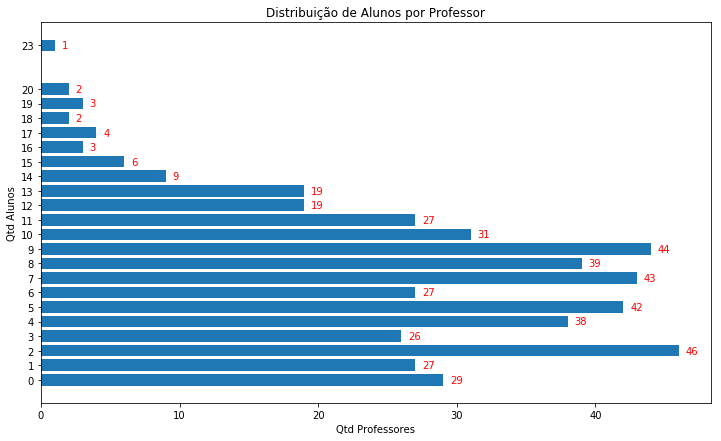

In [185]:
fig, ax = plt.subplots()


plt.barh( qtd_professores_por_alunos.index , qtd_professores_por_alunos.professor  )
plt.yticks( qtd_professores_por_alunos.index , qtd_professores_por_alunos.index )

for i, v in enumerate(qtd_professores_por_alunos.index ):
    ax.text( qtd_professores_por_alunos.iloc[i]['professor'] + 0.5 ,
            v, 
            str(qtd_professores_por_alunos.iloc[i]['professor']), 
            color='red', 
            fontweight='regular',
            va='center')

plt.title( "Distribuição de Alunos por Professor")

plt.xlabel("Qtd Professores")
plt.ylabel("Qtd Alunos")

fig.set_size_inches(12, 7)

plt.show()

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?